# Exploratory Data Analysis

This project utilizes the [**Drowning Detection Dataset**](https://github.com/Wang-Kaikai/drowning-detection-dataset) sourced from the open-access repository provided by Yang et al.

This dataset was originally introduced in their research paper:
[**An Improved YOLOv5 Algorithm for Drowning Detection in the Indoor Swimming Pool**](https://doi.org/10.3390/app14010200)

The dataset consists of labeled images that represent various human states in aquatic environments, including:

- **Drowning**
- **Treading Water**
- **Swimming**

In this section, we aim to perform a thorough exploratory data analysis (EDA) to understand:

- The class distribution across different video segments.
- Sample visualizations for each behavior class.

This analysis serves as a foundation for designing robust detection and classification models in the later stages.


In [2]:
from dotenv import load_dotenv

load_dotenv()

import sys
import os

sys.path.append(os.getenv('SRC_DIR'))

from utils.system import display_system_info

display_system_info(markdown=True)


**Last Updated**: 2025-04-27 16:06:13

**Python Version**: 3.11.12  
**OS**: Windows 10.0.26100  
**Architecture**: 64bit  
**Hostname**: ShenLaptop  
**Processor**: Intel64 Family 6 Model 186 Stepping 3, GenuineIntel  
**RAM Size**: 15.65 GB  
  
        

In [3]:
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

According to the paper by [Wang KaiKai et al.](https://doi.org/10.3390/app14010200), the label numbers are corresponding to the class labels as follows:

| Label Number | Class Name  |
|--------------|-------------|
| 0            | Swimming    |
| 1            | Treading Water |
| 2            | Drowning    |

## Class Label Distribution

Here we check the number of instances in each class

In [6]:
raw_data_img_dir = os.path.join(os.getenv('RAW_DATA_DIR'), os.getenv('IMG_DIR'))
raw_data_img_train_dir = os.path.join(raw_data_img_dir, os.getenv('TRAIN_DIR'))
raw_data_img_val_dir = os.path.join(raw_data_img_dir, os.getenv('val_DIR'))
            
train_img_count = len(os.listdir(raw_data_img_train_dir))
val_img_count = len(os.listdir(raw_data_img_val_dir))

print("%-30s: %d" % ("Number of training images", train_img_count))
print("%-30s: %d" % ("Number of validation images", val_img_count))
print("-" * 50)
print("%-30s: %d" % ("Total number of images", train_img_count + val_img_count))
print("-" * 50)

Number of training images     : 7000
Number of validation images   : 1572
--------------------------------------------------
Total number of images        : 8572
--------------------------------------------------


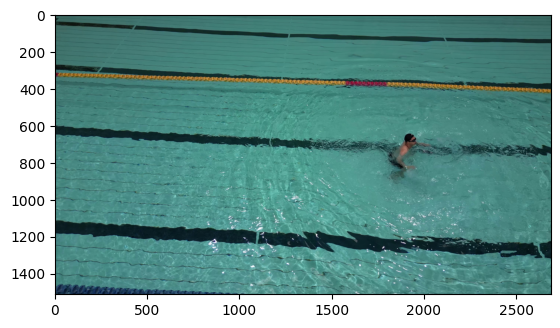

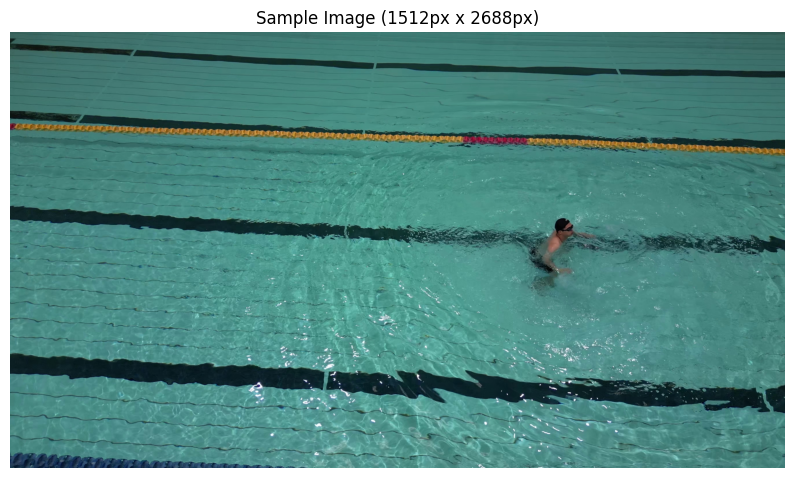

In [19]:
sample_img = cv2.imread(os.path.join(raw_data_img_train_dir, os.listdir(raw_data_img_train_dir)[0]))

plt.figure(figsize=(10, 10))
plt.title("Sample Image (%dpx x %dpx)" % (sample_img.shape[0], sample_img.shape[1]))
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Sample Image Visualisation

This section provides a visual overview of sample frames extracted from the drowning detection dataset. Each image is annotated with bounding boxes indicating detected individuals, which correspond to different classes, that is *swimming*, *treading water*, and *drowning*.


## Sample ROI for Classes

Here we display some sample cropped images for each class

Therefore, we can further confirm that the class labels are as follows:

| Label Number | Class Name  |
|--------------|-------------|
| 0            | Swimming    |
| 1            | Treading Water |
| 2            | Drowning    |

## Understanding Image Channels

To better understand how different color representations impact image perception and feature extraction, we visualize the individual channel components across various color spaces:

- **RGB**: Red, Green, Blue  
- **HSV**: Hue, Saturation, Value  
- **LAB**: Lightness, A (green–red), B (blue–yellow)  

By visualizing these channels independently, we can observe how each component contributes to the image, aiding in preprocessing and model interpretation tasks.
